## P1 Data Exploration & Visualisation
Topics tackled in this lab: 
1. Load the data and find attribute information
2. Generate a statistical summary
3. Generate correlation matrix and scatter plot
4. Dealing with Categorical data
5. Dealing with missing values
6. Find most correlated attributes to output label

## Setup

In [48]:
# Scikit-Learn
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os  # Miscallaneous operating system interfaces

# To plot pretty figures. This magic command sets up your Jupyter Notebook for displaying plots with Matplotlib. Passing 'inline' will display the plot in the notebook itself, immediately below the cell that creates the plot. 
%matplotlib inline 
# the above sets the backend of matplotlib to the 'inline' backend
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'end_to_end_project'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_figure(figure_id, tight_layout=True, figure_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, figure_id + '.' + figure_extension)
    print("Saving figure", figure_id)
    if tight_layout:
        plt.tight_layout
    plt.savefig(path, format=figure_extension, dpi=resolution)

## Get the Data
### Fetch the Data

In [49]:
import os
import tarfile  # makes it possible to read and write tar archives (utility to collect many files into an archive file)
import urllib.request 
import pandas as pd
import seaborn as sns

WINE_PATH = '../data/StudentsPerformance.csv'

def load_data(path=WINE_PATH):
    return pd.read_csv(path)

data = load_data()


#### Pandas DataFrame.head()
The default number of rows displayed is five, but you can specify any number of rows as an argument. 

In [50]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Exploratory Data Analysis (EDA)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Saving figure attribute_histogram_plots


<function matplotlib.pyplot.show(close=None, block=None)>

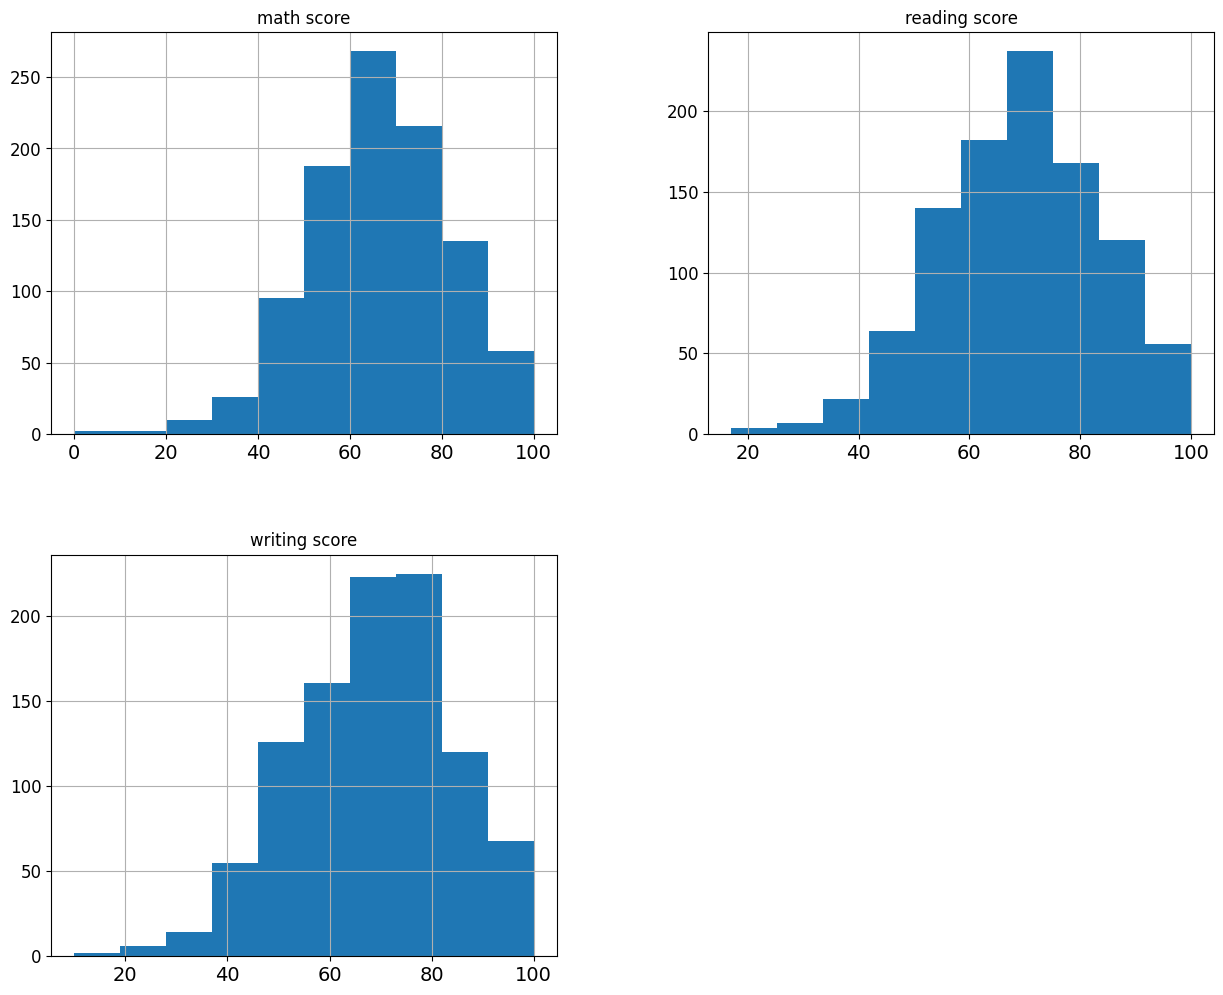

In [52]:
data.hist(bins=10, figsize=(15, 12))
save_figure('attribute_histogram_plots')
plt.show

#### Pandas .plot() 
Returns a line graph containing data from every row in the DataFrame.

<AxesSubplot:xlabel='math score', ylabel='reading score'>

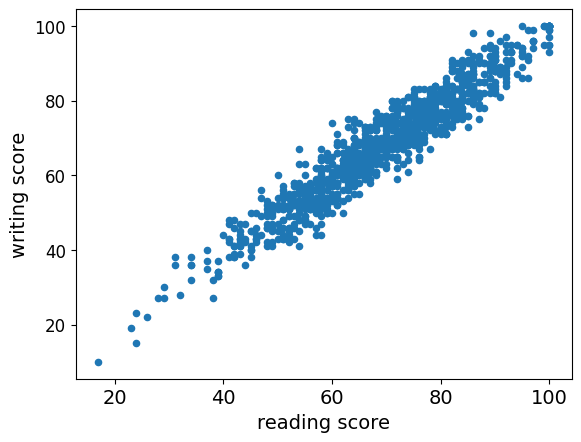

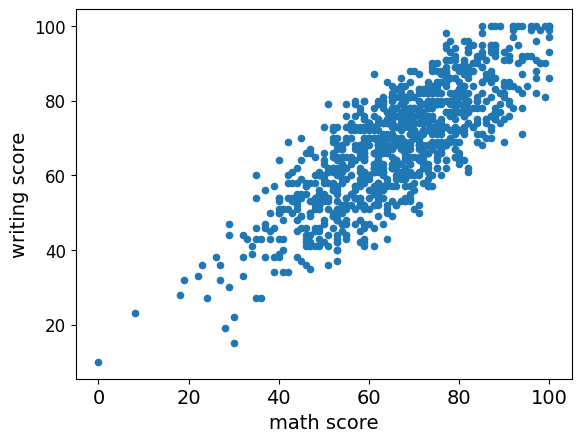

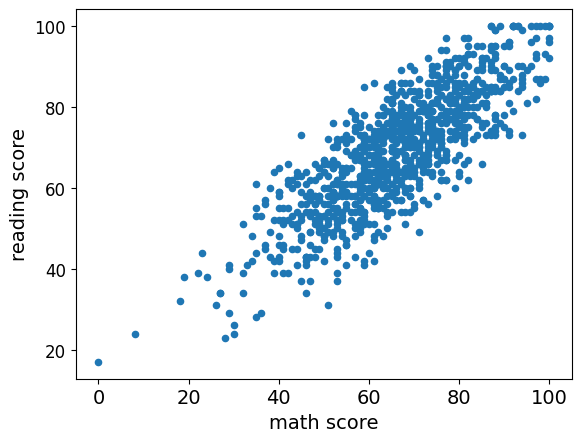

In [33]:
data.plot(x='reading score', y='writing score', kind='scatter')
data.plot(x='math score', y='writing score', kind='scatter')
data.plot(x='math score', y='reading score', kind='scatter')

#### Pandas .corr() 
For an overview of the correlations between different columns, you can use `.corr()`.

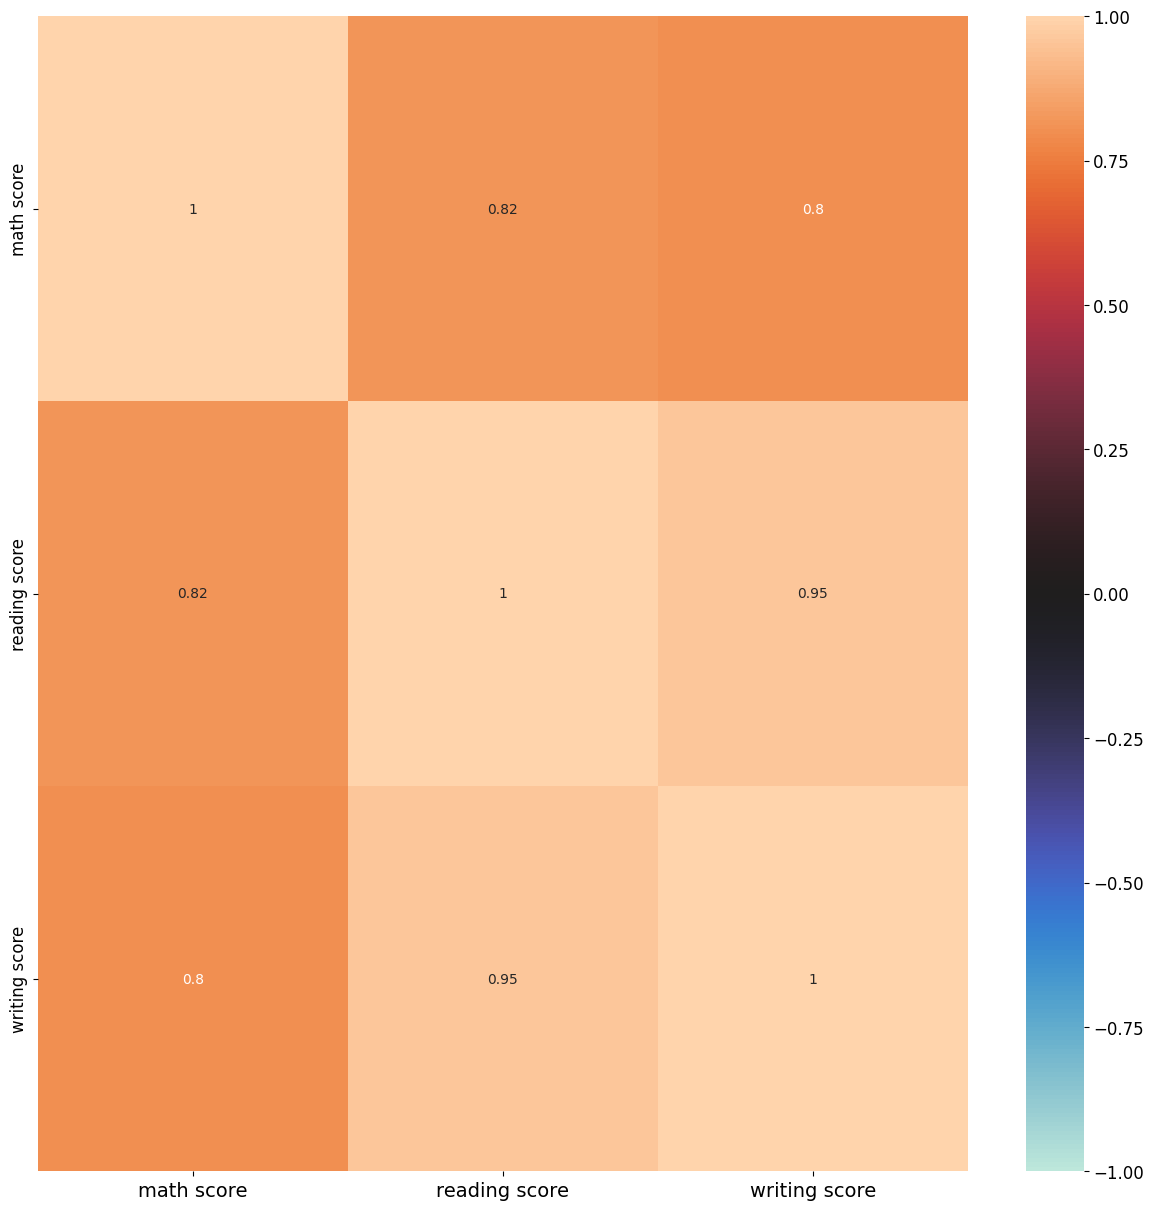

In [44]:
correlation_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(correlation_matrix, annot=True, vmax=1, vmin=-1, center=0, ax=ax)

Saving figure scatter_matrix_plot


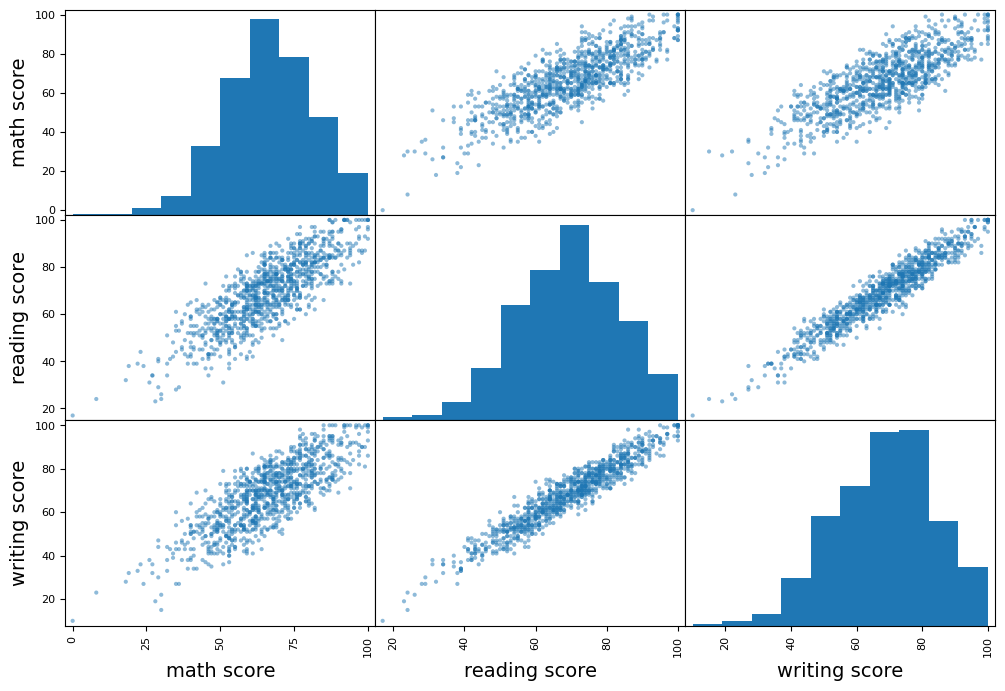

In [55]:
from pandas.plotting import scatter_matrix

correlation_matrix['math score'].sort_values(ascending=False)  # Return correlation of maths with reading and writing in descending order. 
attributes = ['math score', 'reading score', 'writing score']
scatter_matrix(data[attributes], figsize=(12, 8))
save_figure('scatter_matrix_plot')

### Experimenting with Attribute Combinations

#### value_counts()
Pandas Function which returns counts of unique values of a column. Returns a Series.  
The resulting object will be in descending order. It excludes NA values by default. 
**Parameters** 
- *normalize*: bool, default False  
  If True then the object returned will contain the relative frequencies of the unique values. 
- *bins*: int optional  
  Rather than count values, group them into half-open bins

In [18]:
data['parental level of education'].value_counts()  # Returns counts of unique values. 

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [19]:
data['parental level of education'].value_counts(normalize=True)  # Returns normalized counts of unique values.

some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: parental level of education, dtype: float64

In [22]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

This is how you can add columns to the DataFrame: 

In [58]:
data['overall_total_score'] = data['math score'] + data['writing score'] + data['reading score']  # Adds an overall score column to the DataFrame.

## Create a Test Set
We're splitting the data into a training and test data.

In [8]:
np.random.seed(42)  # To make this notebook's output identical at every run.

# Illustrating the train_test_split() of Sklearn.
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))  # Randomly permute a sequence, or return a permuted range.
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(wines, 0.2)
len(train_set)

103977

In [9]:
len(test_set)

25994

In [10]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [11]:
wines_with_id = wines.reset_index()  # Add an index column. 
train_set, test_set = split_train_test_by_id(wines_with_id, 0.2, 'index')
test_set.head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
12,12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
16,16,Argentina,"Baked plum, molasses, balsamic vinegar and che...",Felix,87,30.0,Other,Cafayate,NaN,Michael Schachner,@wineschach,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi


<AxesSubplot:>

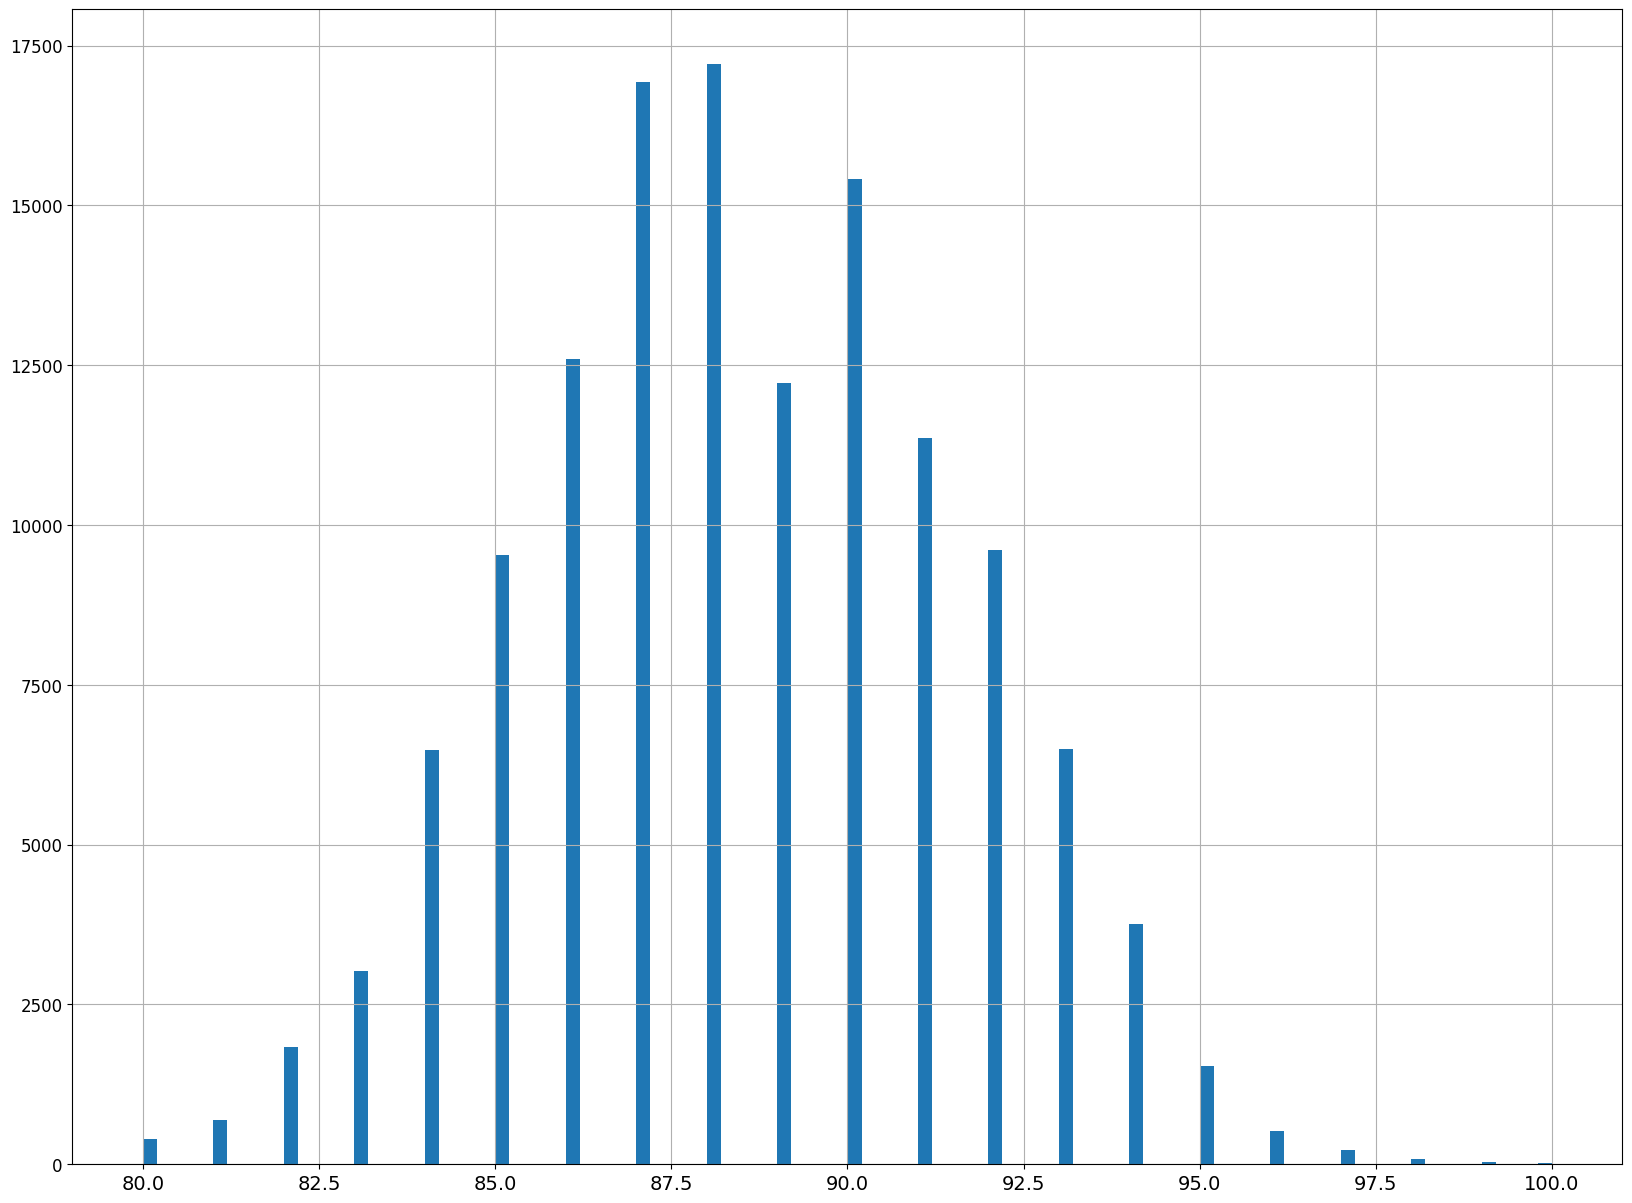

In [24]:
wines['points'].hist(bins=100, figsize=(20, 15))

## Data cleaning
Dealing with missing features: 
1. Get rid of missing values: `dropna()`
2. Get rid of a whole attribute: `drop()`
3. Set the values to some value: `fillna()`

In [33]:
sample_incomplete_rows = wines[wines.isnull().any(axis=1)].head()
sample_incomplete_rows

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


##### Option 1
Remove the records (ie. rows) with missing values for one column:

In [34]:
sample_incomplete_rows.dropna(subset=['price'])

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


##### Option 2
Remove the entire attribute with the missing values

In [35]:
sample_incomplete_rows.drop('price', axis=1)

,country,description,designation,points,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


##### Option 3
Fill the missing values with the median. 

In [37]:
median = wines['price'].median()  # Calculate the median of the wine prices.
sample_incomplete_rows['price'].fillna(median, inplace=True)
sample_incomplete_rows

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,25.0,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
